# TCC - BASE 1 - Rede Neural
===================================================================================================================

Avaliação de técnicas de predição na determinação de preços de bens industriais - TCC

Alunos: Adriano Gonçalves da Silva / Fernando Nahid Leitão / Leonardo Carmo de Holanda

Matrícula: 192.671.008 / 192.671.055 / 192.671.058

E-mail: adrianogo@yahoo.com.br / fernando_nahid@hotmail.com / carmodeholanda@gmail.com

===================================================================================================================

## <font color='blue'>Pré-processamento - 20 classes</font>
===================================================================================================================

### <font color='green'>Carregamento das bibliotecas</font>

*Importando as bibliotecas necessárias para o trabalho*

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
seed = 0
np.random.seed(seed)

### <font color='green'>Leitura dos dados</font>

*Leitura do arquivo BASE1_ETAPA3_v1.csv*

In [4]:
data = pd.read_csv('BASE1_ETAPA3_v1.csv', sep=';', encoding='ISO-8859-1')
data.head()

ABNT_NBR_15980 ESPECIFICA_MATERIAL NBR_6109  ... VOLUME id   VALOR
0         NENHUM            ASTM A36   NENHUM  ...  652.8  1  112.02
1         NENHUM            ASTM A36   NENHUM  ...  652.8  2  112.02
2         NENHUM            ASTM A36   NENHUM  ...  652.8  3  112.02
3         NENHUM            ASTM A36   NENHUM  ...  652.8  4  112.02
4         NENHUM            ASTM A36   NENHUM  ...  652.8  5  112.02

[5 rows x 11 columns]

*Análise exploratória da base*

In [5]:
data.shape

(1682, 11)

In [6]:
data.columns

Index(['ABNT_NBR_15980', 'ESPECIFICA_MATERIAL', 'NBR_6109',
       'REVESTIMENTO_PROTE', 'DESCRICAO_ASTM_A6', 'DESCRICAO_ASTM_A6M',
       'DESCRICAO_NBR_6352', 'TIPO_NORMA_PERFIL', 'VOLUME', 'id', 'VALOR'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ABNT_NBR_15980       1682 non-null   object 
 1   ESPECIFICA_MATERIAL  1682 non-null   object 
 2   NBR_6109             1682 non-null   object 
 3   REVESTIMENTO_PROTE   1682 non-null   object 
 4   DESCRICAO_ASTM_A6    1682 non-null   object 
 5   DESCRICAO_ASTM_A6M   1682 non-null   object 
 6   DESCRICAO_NBR_6352   1682 non-null   object 
 7   TIPO_NORMA_PERFIL    1682 non-null   object 
 8   VOLUME               1682 non-null   float64
 9   id                   1682 non-null   int64  
 10  VALOR                1682 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 144.7+ KB


In [8]:
data.isnull().sum()

ABNT_NBR_15980         0
ESPECIFICA_MATERIAL    0
NBR_6109               0
REVESTIMENTO_PROTE     0
DESCRICAO_ASTM_A6      0
DESCRICAO_ASTM_A6M     0
DESCRICAO_NBR_6352     0
TIPO_NORMA_PERFIL      0
VOLUME                 0
id                     0
VALOR                  0
dtype: int64

## <font color='blue'>Tratamentos dos dados - 20 classes</font>
===================================================================================================================

### <font color='green'>Ajustes na base</font>

*Retirada da coluna id*

In [9]:
data = data.drop(columns=['id'])

*Transformar a base em dummies*

In [10]:
data = pd.get_dummies(data, drop_first=True)

In [11]:
data.head()

VOLUME  ...  TIPO_NORMA_PERFIL_CANT NBR 6355 - ABAS IGUAIS
0   652.8  ...                                              0
1   652.8  ...                                              0
2   652.8  ...                                              0
3   652.8  ...                                              0
4   652.8  ...                                              0

[5 rows x 112 columns]

*Visualização de histograma*

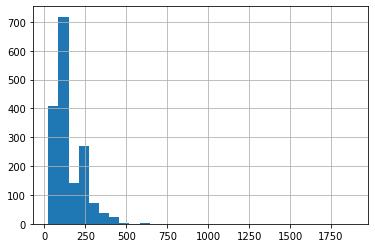

In [12]:
data['VALOR'].hist(bins = 30)

*Visualização da base*

In [13]:
data.head()

VOLUME  ...  TIPO_NORMA_PERFIL_CANT NBR 6355 - ABAS IGUAIS
0   652.8  ...                                              0
1   652.8  ...                                              0
2   652.8  ...                                              0
3   652.8  ...                                              0
4   652.8  ...                                              0

[5 rows x 112 columns]

In [14]:
data.shape

(1682, 112)

### <font color='green'>Categorização</font>

*Rodar o Kmeans*

In [15]:
kmeans = KMeans(n_clusters=20, random_state=seed)
kmeans = kmeans.fit(data)

In [16]:
kmeans.labels_

array([2, 2, 2, ..., 8, 8, 8], dtype=int32)

In [17]:
data['labels'] = kmeans.labels_

In [18]:
data.head()

VOLUME   VALOR  ...  TIPO_NORMA_PERFIL_CANT NBR 6355 - ABAS IGUAIS  labels
0   652.8  112.02  ...                                              0       2
1   652.8  112.02  ...                                              0       2
2   652.8  112.02  ...                                              0       2
3   652.8  112.02  ...                                              0       2
4   652.8  112.02  ...                                              0       2

[5 rows x 113 columns]

In [19]:
data['labels'] = data['labels'].astype('category')

In [20]:
data = data.drop(columns=['VALOR'])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Columns: 112 entries, VOLUME to labels
dtypes: category(1), float64(1), uint8(110)
memory usage: 196.4 KB


*Tranforma todas as variáveis não numéricas em 'category'*

In [22]:
categorical_columns = data.select_dtypes(exclude='float64').columns

for column in categorical_columns:
    data[column] = data[column].astype('category')

## <font color='blue'>Uso de rede neural - 20 classes</font>
===================================================================================================================

### <font color='green'>Preparação para uso</font>

*Separar a base em treino e teste*

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,data.columns != 'labels'], data['labels'], test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1345, 111)
(337, 111)
(1345,)
(337,)


*Normalizando os Dados*

In [24]:
from sklearn import preprocessing
preprocessParams = preprocessing.StandardScaler().fit(X_train)
X_train_normalized = preprocessParams.transform(X_train)
X_test_normalized = preprocessParams.transform(X_test)

X_train_normalized[0:2, :]

array([[-0.96533551, -0.05461546, -0.06108472, -0.06693994, -0.13762047,
        -0.02727724, -0.07735338, -0.04728075, -0.25645394,  0.        ,
         0.        , -0.06108472, -0.25809649, -0.0385902 , -0.20451905,
        -0.0385902 , -0.0385902 , -0.09488019, -0.0385902 ,  0.53694895,
         0.10619885, -0.0385902 , -0.09080681, -0.02727724, -0.06693994,
        -0.13478893, -0.02727724, -0.07735338, -0.02727724,  0.        ,
        -0.02727724, -0.04728075, -0.0385902 ,  0.19444444,  0.11314241,
        -0.06693994, -0.12285902, -0.02727724, -0.02727724,  0.        ,
        -0.02727724, -0.02727724,  0.        , -0.0385902 , -0.17953637,
        -0.165837  , -0.18818038, -0.0385902 , -0.06108472,  0.        ,
         0.        ,  3.40148401, -0.15611428, -0.02727724,  0.        ,
        -0.19852625, -0.505802  , -0.07233042, -0.06693994, -0.0987915 ,
        -0.09080681, -0.22167987, -0.13190103, -0.0987915 , -0.07233042,
        -0.0385902 , -0.28493808, -0.22716253, -0.1

### <font color='green'>Modelo de rede neural</font>

*Definições da rede neural*

In [25]:
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

RN = Sequential()
RN.add(Dense(112,input_shape = X_train_normalized.shape[1:],activation = 'sigmoid'))
RN.add(Dense(20,activation = 'sigmoid'))
RN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 112)               12544     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                2260      
Total params: 14,804
Trainable params: 14,804
Non-trainable params: 0
_________________________________________________________________


*Treinamento da rede neural*

In [26]:
from tensorflow.keras.utils import to_categorical
RN.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy']) 
history = RN.fit(X_train_normalized, to_categorical(y_train), epochs = 500)

Epoch 1/500
43/43 [==============================] - 1s 2ms/step - loss: 0.6869 - accuracy: 0.0305
Epoch 2/500
43/43 [==============================] - 0s 2ms/step - loss: 0.5778 - accuracy: 0.0357
Epoch 3/500
43/43 [==============================] - 0s 2ms/step - loss: 0.4962 - accuracy: 0.0416
Epoch 4/500
43/43 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.0454
Epoch 5/500
43/43 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.0468
Epoch 6/500
43/43 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.0394
Epoch 7/500
43/43 [==============================] - 0s 2ms/step - loss: 0.3261 - accuracy: 0.0520
Epoch 8/500
43/43 [==============================] - 0s 2ms/step - loss: 0.3040 - accuracy: 0.1048
Epoch 9/500
43/43 [==============================] - 0s 2ms/step - loss: 0.2862 - accuracy: 0.1494
Epoch 10/500
43/43 [==============================] - 0s 2ms/step - loss: 0.2717 - accuracy: 0.1190
Epoch 11/

*Teste da rede neural*

In [27]:
score = RN.evaluate(X_test_normalized, to_categorical(y_test), verbose = 0)
print('Test score:', score[0])
print('Test mape:', score[1])

Test score: 0.07535827159881592
Test mape: 0.8991097807884216


### <font color='green'>Previsão da rede neural</font>

*Previsao da rede neural - Matriz de confusão*

In [28]:
from sklearn.metrics import confusion_matrix
y_test_predicted = RN.predict(X_test_normalized)
y_test_predicted_indexes = np.argmax(y_test_predicted,axis=1)
y_test_indexes = y_test.values

In [29]:
confMatrix = confusion_matrix(y_test_predicted_indexes.astype(int), y_test_indexes)

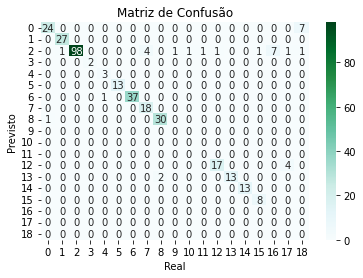

In [30]:
import seaborn as sns
from matplotlib import pyplot as plt
ax = plt.subplot()
sns.heatmap(confMatrix, annot=True, fmt=".0f", cmap=plt.cm.BuGn)
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Matriz de Confusão')

plt.show()

## <font color='blue'>Pré-processamento - 10 classes</font>
===================================================================================================================

### <font color='green'>Carregamento das bibliotecas</font>

*Importando as bibliotecas necessárias para o trabalho*

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
seed = 0
np.random.seed(seed)

### <font color='green'>Leitura dos dados</font>

*Leitura do arquivo BASE1_ETAPA3_v1.csv*

In [32]:
data = pd.read_csv('BASE1_ETAPA3_v1.csv', sep=';', encoding='ISO-8859-1')
data.head()

ABNT_NBR_15980 ESPECIFICA_MATERIAL NBR_6109  ... VOLUME id   VALOR
0         NENHUM            ASTM A36   NENHUM  ...  652.8  1  112.02
1         NENHUM            ASTM A36   NENHUM  ...  652.8  2  112.02
2         NENHUM            ASTM A36   NENHUM  ...  652.8  3  112.02
3         NENHUM            ASTM A36   NENHUM  ...  652.8  4  112.02
4         NENHUM            ASTM A36   NENHUM  ...  652.8  5  112.02

[5 rows x 11 columns]

*Análise exploratória da base*

In [33]:
data.shape

(1682, 11)

In [34]:
data.columns

Index(['ABNT_NBR_15980', 'ESPECIFICA_MATERIAL', 'NBR_6109',
       'REVESTIMENTO_PROTE', 'DESCRICAO_ASTM_A6', 'DESCRICAO_ASTM_A6M',
       'DESCRICAO_NBR_6352', 'TIPO_NORMA_PERFIL', 'VOLUME', 'id', 'VALOR'],
      dtype='object')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ABNT_NBR_15980       1682 non-null   object 
 1   ESPECIFICA_MATERIAL  1682 non-null   object 
 2   NBR_6109             1682 non-null   object 
 3   REVESTIMENTO_PROTE   1682 non-null   object 
 4   DESCRICAO_ASTM_A6    1682 non-null   object 
 5   DESCRICAO_ASTM_A6M   1682 non-null   object 
 6   DESCRICAO_NBR_6352   1682 non-null   object 
 7   TIPO_NORMA_PERFIL    1682 non-null   object 
 8   VOLUME               1682 non-null   float64
 9   id                   1682 non-null   int64  
 10  VALOR                1682 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 144.7+ KB


In [36]:
data.isnull().sum()

ABNT_NBR_15980         0
ESPECIFICA_MATERIAL    0
NBR_6109               0
REVESTIMENTO_PROTE     0
DESCRICAO_ASTM_A6      0
DESCRICAO_ASTM_A6M     0
DESCRICAO_NBR_6352     0
TIPO_NORMA_PERFIL      0
VOLUME                 0
id                     0
VALOR                  0
dtype: int64

## <font color='blue'>Tratamentos dos dados - 10 classes</font>
===================================================================================================================

### <font color='green'>Ajustes na base</font>

*Retirada da coluna id*

In [37]:
#data = data.drop(columns=['id'])

*Transformar a base em dummies*

In [38]:
data = pd.get_dummies(data, drop_first=True)

In [39]:
data.head()

VOLUME  ...  TIPO_NORMA_PERFIL_CANT NBR 6355 - ABAS IGUAIS
0   652.8  ...                                              0
1   652.8  ...                                              0
2   652.8  ...                                              0
3   652.8  ...                                              0
4   652.8  ...                                              0

[5 rows x 113 columns]

*Visualização de histograma*

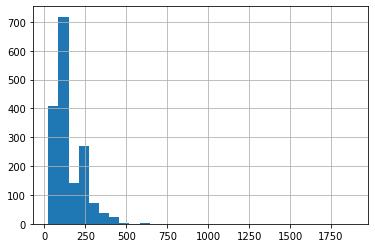

In [40]:
data['VALOR'].hist(bins = 30)

*Visualização da base*

In [41]:
data.head()

VOLUME  ...  TIPO_NORMA_PERFIL_CANT NBR 6355 - ABAS IGUAIS
0   652.8  ...                                              0
1   652.8  ...                                              0
2   652.8  ...                                              0
3   652.8  ...                                              0
4   652.8  ...                                              0

[5 rows x 113 columns]

In [42]:
data.shape

(1682, 113)

### <font color='green'>Categorização</font>

*Rodar o Kmeans*

In [43]:
kmeans = KMeans(n_clusters=10, random_state=seed)
kmeans = kmeans.fit(data)

In [44]:
kmeans.labels_

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

In [45]:
data['labels'] = kmeans.labels_

In [46]:
data.head()

VOLUME  id  ...  TIPO_NORMA_PERFIL_CANT NBR 6355 - ABAS IGUAIS  labels
0   652.8   1  ...                                              0       1
1   652.8   2  ...                                              0       1
2   652.8   3  ...                                              0       1
3   652.8   4  ...                                              0       1
4   652.8   5  ...                                              0       1

[5 rows x 114 columns]

In [47]:
data['labels'] = data['labels'].astype('category')

In [48]:
data = data.drop(columns=['VALOR'])

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Columns: 113 entries, VOLUME to labels
dtypes: category(1), float64(1), int64(1), uint8(110)
memory usage: 209.1 KB


*Tranforma todas as variáveis não numéricas em 'category'*

In [50]:
categorical_columns = data.select_dtypes(exclude='float64').columns

for column in categorical_columns:
    data[column] = data[column].astype('category')

## <font color='blue'>Uso de rede neural - 10 classes</font>
===================================================================================================================

### <font color='green'>Preparação para uso</font>

*Separar a base em treino e teste*

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,data.columns != 'labels'], data['labels'], test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1345, 112)
(337, 112)
(1345,)
(337,)


*Normalizando os Dados*

In [52]:
from sklearn import preprocessing
preprocessParams = preprocessing.StandardScaler().fit(X_train)
X_train_normalized = preprocessParams.transform(X_train)
X_test_normalized = preprocessParams.transform(X_test)

X_train_normalized[0:2, :]

array([[-0.96533551, -0.16863404, -0.05461546, -0.06108472, -0.06693994,
        -0.13762047, -0.02727724, -0.07735338, -0.04728075, -0.25645394,
         0.        ,  0.        , -0.06108472, -0.25809649, -0.0385902 ,
        -0.20451905, -0.0385902 , -0.0385902 , -0.09488019, -0.0385902 ,
         0.53694895,  0.10619885, -0.0385902 , -0.09080681, -0.02727724,
        -0.06693994, -0.13478893, -0.02727724, -0.07735338, -0.02727724,
         0.        , -0.02727724, -0.04728075, -0.0385902 ,  0.19444444,
         0.11314241, -0.06693994, -0.12285902, -0.02727724, -0.02727724,
         0.        , -0.02727724, -0.02727724,  0.        , -0.0385902 ,
        -0.17953637, -0.165837  , -0.18818038, -0.0385902 , -0.06108472,
         0.        ,  0.        ,  3.40148401, -0.15611428, -0.02727724,
         0.        , -0.19852625, -0.505802  , -0.07233042, -0.06693994,
        -0.0987915 , -0.09080681, -0.22167987, -0.13190103, -0.0987915 ,
        -0.07233042, -0.0385902 , -0.28493808, -0.2

### <font color='green'>Modelo de rede neural</font>

*Definições da rede neural*

In [53]:
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

RN = Sequential()
RN.add(Dense(112,input_shape = X_train_normalized.shape[1:],activation = 'sigmoid'))
RN.add(Dense(10,activation = 'sigmoid'))
RN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 112)               12656     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1130      
Total params: 13,786
Trainable params: 13,786
Non-trainable params: 0
_________________________________________________________________


*Treinamento da rede neural*

In [54]:
from tensorflow.keras.utils import to_categorical
RN.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy']) 
history = RN.fit(X_train_normalized, to_categorical(y_train), epochs = 500)

Epoch 1/500
43/43 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.0796
Epoch 2/500
43/43 [==============================] - 0s 2ms/step - loss: 0.5444 - accuracy: 0.0506
Epoch 3/500
43/43 [==============================] - 0s 2ms/step - loss: 0.4571 - accuracy: 0.0662
Epoch 4/500
43/43 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.1807
Epoch 5/500
43/43 [==============================] - 0s 2ms/step - loss: 0.3766 - accuracy: 0.1807
Epoch 6/500
43/43 [==============================] - 0s 2ms/step - loss: 0.3573 - accuracy: 0.1814
Epoch 7/500
43/43 [==============================] - 0s 2ms/step - loss: 0.3443 - accuracy: 0.1814
Epoch 8/500
43/43 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.2067
Epoch 9/500
43/43 [==============================] - 0s 2ms/step - loss: 0.3284 - accuracy: 0.2483
Epoch 10/500
43/43 [==============================] - 0s 2ms/step - loss: 0.3231 - accuracy: 0.2535
Epoch 11/

*Teste da rede neural*

In [55]:
score = RN.evaluate(X_test_normalized, to_categorical(y_test), verbose = 0)
print('Test score:', score[0])
print('Test mape:', score[1])

Test score: 0.0755801796913147
Test mape: 0.925815999507904


### <font color='green'>Previsão da rede neural</font>

*Previsao da rede neural - Matriz de confusão*

In [56]:
from sklearn.metrics import confusion_matrix
y_test_predicted = RN.predict(X_test_normalized)
y_test_predicted_indexes = np.argmax(y_test_predicted,axis=1)
y_test_indexes = y_test.values

In [57]:
confMatrix = confusion_matrix(y_test_predicted_indexes.astype(int), y_test_indexes)

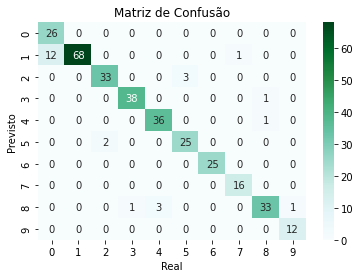

In [58]:
import seaborn as sns
from matplotlib import pyplot as plt
ax = plt.subplot()
sns.heatmap(confMatrix, annot=True, fmt=".0f", cmap=plt.cm.BuGn)
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Matriz de Confusão')

plt.show()

## <font color='blue'>Pré-processamento - 5 classes</font>
===================================================================================================================

### <font color='green'>Carregamento das bibliotecas</font>

*Importando as bibliotecas necessárias para o trabalho*

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
seed = 0
np.random.seed(seed)

### <font color='green'>Leitura dos dados</font>

*Leitura do arquivo BASE1_ETAPA3_v1.csv*

In [60]:
data = pd.read_csv('BASE1_ETAPA3_v1.csv', sep=';', encoding='ISO-8859-1')
data.head()

ABNT_NBR_15980 ESPECIFICA_MATERIAL NBR_6109  ... VOLUME id   VALOR
0         NENHUM            ASTM A36   NENHUM  ...  652.8  1  112.02
1         NENHUM            ASTM A36   NENHUM  ...  652.8  2  112.02
2         NENHUM            ASTM A36   NENHUM  ...  652.8  3  112.02
3         NENHUM            ASTM A36   NENHUM  ...  652.8  4  112.02
4         NENHUM            ASTM A36   NENHUM  ...  652.8  5  112.02

[5 rows x 11 columns]

*Análise exploratória da base*

In [61]:
data.shape

(1682, 11)

In [62]:
data.columns

Index(['ABNT_NBR_15980', 'ESPECIFICA_MATERIAL', 'NBR_6109',
       'REVESTIMENTO_PROTE', 'DESCRICAO_ASTM_A6', 'DESCRICAO_ASTM_A6M',
       'DESCRICAO_NBR_6352', 'TIPO_NORMA_PERFIL', 'VOLUME', 'id', 'VALOR'],
      dtype='object')

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ABNT_NBR_15980       1682 non-null   object 
 1   ESPECIFICA_MATERIAL  1682 non-null   object 
 2   NBR_6109             1682 non-null   object 
 3   REVESTIMENTO_PROTE   1682 non-null   object 
 4   DESCRICAO_ASTM_A6    1682 non-null   object 
 5   DESCRICAO_ASTM_A6M   1682 non-null   object 
 6   DESCRICAO_NBR_6352   1682 non-null   object 
 7   TIPO_NORMA_PERFIL    1682 non-null   object 
 8   VOLUME               1682 non-null   float64
 9   id                   1682 non-null   int64  
 10  VALOR                1682 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 144.7+ KB


In [64]:
data.isnull().sum()

ABNT_NBR_15980         0
ESPECIFICA_MATERIAL    0
NBR_6109               0
REVESTIMENTO_PROTE     0
DESCRICAO_ASTM_A6      0
DESCRICAO_ASTM_A6M     0
DESCRICAO_NBR_6352     0
TIPO_NORMA_PERFIL      0
VOLUME                 0
id                     0
VALOR                  0
dtype: int64

## <font color='blue'>Tratamentos dos dados - 5 classes</font>
===================================================================================================================

### <font color='green'>Ajustes na base</font>

*Retirada da coluna id*

In [65]:
#data = data.drop(columns=['id'])

*Transformar a base em dummies*

In [66]:
data = pd.get_dummies(data, drop_first=True)

In [67]:
data.head()

VOLUME  ...  TIPO_NORMA_PERFIL_CANT NBR 6355 - ABAS IGUAIS
0   652.8  ...                                              0
1   652.8  ...                                              0
2   652.8  ...                                              0
3   652.8  ...                                              0
4   652.8  ...                                              0

[5 rows x 113 columns]

*Visualização de histograma*

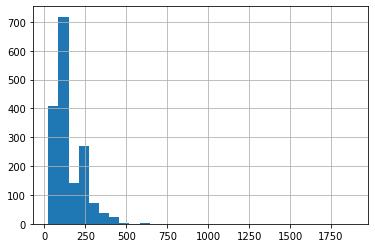

In [68]:
data['VALOR'].hist(bins = 30)

*Visualização da base*

In [69]:
data.head()

VOLUME  ...  TIPO_NORMA_PERFIL_CANT NBR 6355 - ABAS IGUAIS
0   652.8  ...                                              0
1   652.8  ...                                              0
2   652.8  ...                                              0
3   652.8  ...                                              0
4   652.8  ...                                              0

[5 rows x 113 columns]

In [70]:
data.shape

(1682, 113)

### <font color='green'>Categorização</font>

*Rodar o Kmeans*

In [71]:
kmeans = KMeans(n_clusters=5, random_state=seed)
kmeans = kmeans.fit(data)

In [72]:
kmeans.labels_

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [73]:
data['labels'] = kmeans.labels_

In [74]:
data.head()

VOLUME  id  ...  TIPO_NORMA_PERFIL_CANT NBR 6355 - ABAS IGUAIS  labels
0   652.8   1  ...                                              0       0
1   652.8   2  ...                                              0       0
2   652.8   3  ...                                              0       0
3   652.8   4  ...                                              0       0
4   652.8   5  ...                                              0       0

[5 rows x 114 columns]

In [75]:
data['labels'] = data['labels'].astype('category')

In [76]:
data = data.drop(columns=['VALOR'])

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Columns: 113 entries, VOLUME to labels
dtypes: category(1), float64(1), int64(1), uint8(110)
memory usage: 208.9 KB


*Tranforma todas as variáveis não numéricas em 'category'*

In [78]:
categorical_columns = data.select_dtypes(exclude='float64').columns

for column in categorical_columns:
    data[column] = data[column].astype('category')

## <font color='blue'>Uso de rede neural - 5 classes</font>
===================================================================================================================

### <font color='green'>Preparação para uso</font>

*Separar a base em treino e teste*

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,data.columns != 'labels'], data['labels'], test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1345, 112)
(337, 112)
(1345,)
(337,)


*Normalizando os Dados*

In [80]:
from sklearn import preprocessing
preprocessParams = preprocessing.StandardScaler().fit(X_train)
X_train_normalized = preprocessParams.transform(X_train)
X_test_normalized = preprocessParams.transform(X_test)

X_train_normalized[0:2, :]

array([[-0.96533551, -0.16863404, -0.05461546, -0.06108472, -0.06693994,
        -0.13762047, -0.02727724, -0.07735338, -0.04728075, -0.25645394,
         0.        ,  0.        , -0.06108472, -0.25809649, -0.0385902 ,
        -0.20451905, -0.0385902 , -0.0385902 , -0.09488019, -0.0385902 ,
         0.53694895,  0.10619885, -0.0385902 , -0.09080681, -0.02727724,
        -0.06693994, -0.13478893, -0.02727724, -0.07735338, -0.02727724,
         0.        , -0.02727724, -0.04728075, -0.0385902 ,  0.19444444,
         0.11314241, -0.06693994, -0.12285902, -0.02727724, -0.02727724,
         0.        , -0.02727724, -0.02727724,  0.        , -0.0385902 ,
        -0.17953637, -0.165837  , -0.18818038, -0.0385902 , -0.06108472,
         0.        ,  0.        ,  3.40148401, -0.15611428, -0.02727724,
         0.        , -0.19852625, -0.505802  , -0.07233042, -0.06693994,
        -0.0987915 , -0.09080681, -0.22167987, -0.13190103, -0.0987915 ,
        -0.07233042, -0.0385902 , -0.28493808, -0.2

### <font color='green'>Modelo de rede neural</font>

*Definições da rede neural*

In [81]:
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

RN = Sequential()
RN.add(Dense(112,input_shape = X_train_normalized.shape[1:],activation = 'sigmoid'))
RN.add(Dense(5,activation = 'sigmoid'))
RN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 112)               12656     
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 565       
Total params: 13,221
Trainable params: 13,221
Non-trainable params: 0
_________________________________________________________________


*Treinamento da rede neural*

In [82]:
from tensorflow.keras.utils import to_categorical
RN.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy']) 
history = RN.fit(X_train_normalized, to_categorical(y_train), epochs = 500)

Epoch 1/500
43/43 [==============================] - 1s 2ms/step - loss: 0.5697 - accuracy: 0.2706
Epoch 2/500
43/43 [==============================] - 0s 2ms/step - loss: 0.5178 - accuracy: 0.2446
Epoch 3/500
43/43 [==============================] - 0s 2ms/step - loss: 0.4952 - accuracy: 0.2602
Epoch 4/500
43/43 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.2706
Epoch 5/500
43/43 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.4364
Epoch 6/500
43/43 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.4416
Epoch 7/500
43/43 [==============================] - 0s 2ms/step - loss: 0.4614 - accuracy: 0.4498
Epoch 8/500
43/43 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.4520
Epoch 9/500
43/43 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.4513
Epoch 10/500
43/43 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.5480
Epoch 11/

*Teste da rede neural*

In [83]:
score = RN.evaluate(X_test_normalized, to_categorical(y_test), verbose = 0)
print('Test score:', score[0])
print('Test mape:', score[1])

Test score: 0.07190074771642685
Test mape: 0.9436202049255371


### <font color='green'>Previsão da rede neural</font>

*Previsao da rede neural - Matriz de confusão*

In [84]:
from sklearn.metrics import confusion_matrix
y_test_predicted = RN.predict(X_test_normalized)
y_test_predicted_indexes = np.argmax(y_test_predicted,axis=1)
y_test_indexes = y_test.values

In [85]:
confMatrix = confusion_matrix(y_test_predicted_indexes.astype(int), y_test_indexes)

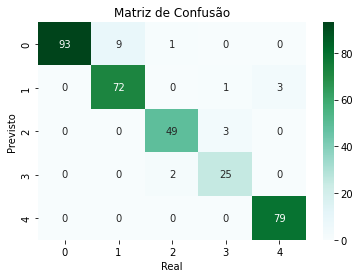

In [86]:
import seaborn as sns
from matplotlib import pyplot as plt
ax = plt.subplot()
sns.heatmap(confMatrix, annot=True, fmt=".0f", cmap=plt.cm.BuGn)
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Matriz de Confusão')

plt.show()